This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/
#Fatto!

In [1]:
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [4]:
#Exercise 1

N=100000 #Pandas DataFrame has no intrinsic length limits: the limit is set by computer memory. 
input_file = "./data/data_000637.txt"
Ndf = pd.read_csv(input_file, sep = ",", nrows=N)
Ndf

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
99995     1     0           64  3869201161        2378        29
99996     1     0           70  3869201161        2472        26
99997     1     0           58  3869201161        2558         0
99998     1     0           57  3869201161        2561        23
99999     1     0           56  3869201161        2565        12

[100000 rows x 6 columns]

In [12]:
#For the following exercises, I will consider the complete data taking:
df = pd.read_csv(input_file)
df

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]

2. Estimate the number of BX in a ORBIT (the value 'x').

In [13]:
#Exercise 2

#1 ORBIT = X BX_COUNTER
max_bx_counter = df["BX_COUNTER"].max()+1
print("Number of BX in an orbit: ", max_bx_counter)


Number of BX in an orbit:  3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [14]:
#Exercise 3 AND 4

#Build an additional column with time in ns (EX 4)
df["Time"] = df["TDC_MEAS"] * 25/30 + df["BX_COUNTER"] * 25 + df["ORBIT_CNT"] * 25 * max_bx_counter

#Calculate the duration of the data taking (EX 3)
ns_tot = (df.iloc[-1]["Time"] - df.iloc[0]["Time"])
s_tot= ns_tot/10**9
print("Duration (s) of the data taking (subsample of N events):", s_tot, " s")


Duration (s) of the data taking (subsample of N events): 0.9804160933125  s


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [15]:
#Exercise 5

noisy_ch = df.groupby("TDC_CHANNEL").TDC_CHANNEL.count().nlargest(3)
noisy_ch

TDC_CHANNEL
139    108059
64      66020
63      64642
Name: TDC_CHANNEL, dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [16]:
#Exercise 6

non_zero_orbits=df[df["ORBIT_CNT"]!=0] #Select non-empty orbits
print("Number of non-empty orbits:", len(non_zero_orbits), " => All the orbits are actually non-empty")

Channel139 = non_zero_orbits[non_zero_orbits['TDC_CHANNEL'] == 139] #Select channel 139 
Channel139 = Channel139.groupby('ORBIT_CNT') # Consider unique orbits
print("Channel 139 -> Number of unique non-empty orbits: ",len(Channel139))

Number of non-empty orbits: 1310720  => All the orbits are actually non-empty
Channel 139 -> Number of unique non-empty orbits:  10976


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

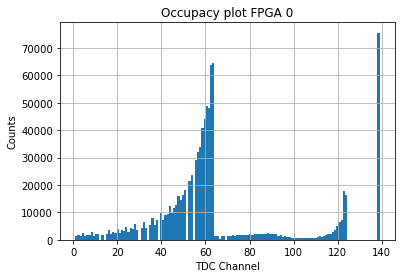

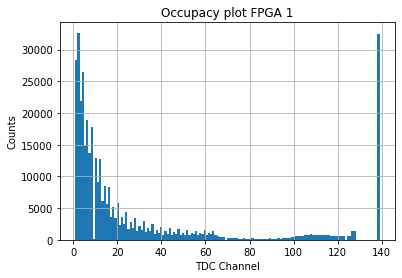

In [17]:
#Exercise 7 (optional)

df0 = df[df["FPGA"]==0]
hist = df0.hist("TDC_CHANNEL", bins= 140)
hist=hist[0]
for i in hist:
    i.set_title("Occupacy plot FPGA 0")
    i.set_xlabel("TDC Channel")
    i.set_ylabel("Counts")


df1 = df[df["FPGA"]==1]
hist = df1.hist("TDC_CHANNEL", bins= 140)
hist=hist[0]
for i in hist:
    i.set_title("Occupacy plot FPGA 1")
    i.set_xlabel("TDC Channel")
    i.set_ylabel("Counts")
